# ДЗ №1 по ML - 
Предсказать параметр MEDV из данного датасета, модель линейной регрессии, разбить train/test на 0.75/0.25


In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')

In [98]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
# проверка на nunе 
df.isna().sum().sum()

0

In [57]:
#для этого удалим столбец MEDV по оси х, 
df.drop('MEDV',axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
#в качестве у возьмем столбец MEDV
df.MEDV

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [100]:
#распилим файл на тестовую 25% и тренировочную часть 75% random_state - любое число
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV',axis=1), df['MEDV'], test_size=0.25, random_state=31)

In [77]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
434,13.91340,0.0,18.10,0.0,0.713,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63
175,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,5.0,296.0,16.6,390.96,5.33
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72


In [59]:
y_train.head()

185    29.6
441    17.1
302    26.4
129    14.3
289    24.8
Name: MEDV, dtype: float64

In [67]:
X_train.shape

(379, 13)

In [68]:
X_test.shape

(127, 13)

In [23]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [101]:
# линейная регрессия
reg = LinearRegression().fit(X_train, y_train) #обучаем модель
pred = reg.predict(X_test) #предсказываем

print(mean_squared_error(y_test, pred, squared=True))  # среднеквадратичное - насколько ошибка в у. ОШИБКА! большая

19.71897553382295


In [74]:
y_test.describe()

count    127.000000
mean      22.090551
std        9.180980
min        5.000000
25%       16.550000
50%       21.200000
75%       24.200000
max       50.000000
Name: MEDV, dtype: float64

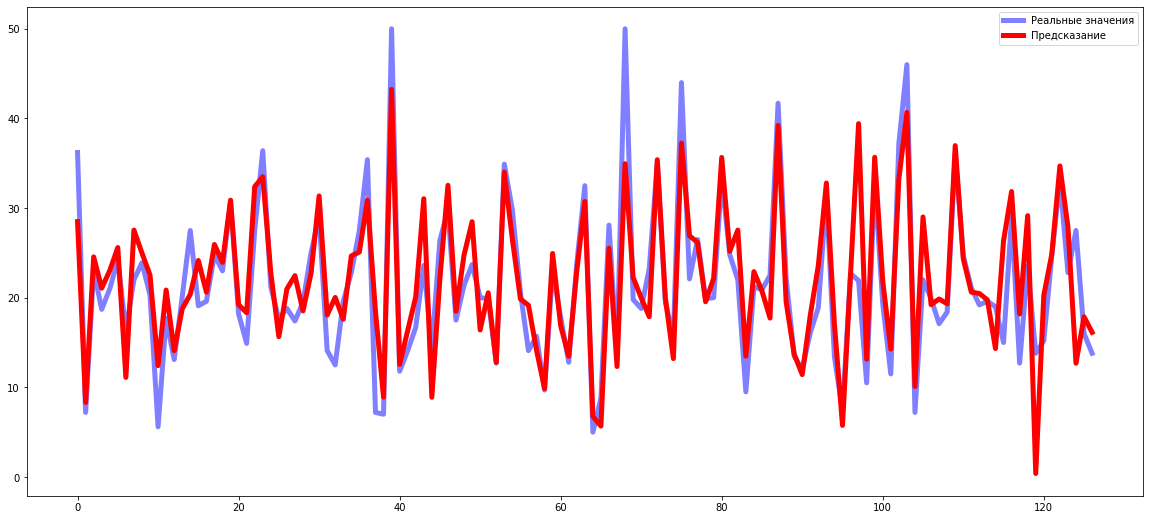

In [102]:
# посмотрим насколько идеальна модель - практически совпадает
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue",linewidth=5, label='Реальные значения', alpha=0.5)
plt.plot(pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.show()

In [103]:
# рассмотрим с помощью деревьев
from sklearn import tree
clf = tree.DecisionTreeRegressor()

In [104]:
clf = clf.fit(X_train, y_train) #передали данные, затем предсказание

In [105]:
red_clf = clf.predict(X_test)

In [106]:
# значимость параметров 
# вывод!!!!! видим что RM очень большое, утечка!! если ее удалить 
frame = { 'FeatureImportance': clf.feature_importances_, 'Feature': X_train.columns }
result = pd.DataFrame(frame)
result.sort_values(by='FeatureImportance', ascending=False).head(10)

,FeatureImportance,Feature
5,0.616749,RM
12,0.173633,LSTAT
7,0.091189,DIS
0,0.034972,CRIM
10,0.028261,PTRATIO
4,0.019769,NOX
9,0.014433,TAX
6,0.010766,AGE
11,0.005094,B
2,0.002019,INDUS


In [107]:
df.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
#   ВОПРОС?????!!!!!
# ЕСЛИ СМОТРЕТЬ ПО ТАБЛИЦЕ, ТО ЗНАЧЕНИЕ УТЕЧКИ ПОЛЕ - RM
# НО!!!! ПО ТАБЛИЦЕ КОРРЕЛЯЦИИ ПОЛЕ - CRIM
# НА ЧТО ОБРАШАЕМ ВНИМАНИЕ?  КАКОЕ ПОЛЕ УДАЛИТЬ ЧТОБЫ РЕШИТЬ НАШУ ЗАДАЧУ

In [117]:
#удалим RM и проведем все сначала - и увидим что LSTAT теперь самый большой
del df['RM']  #CRIM

In [109]:
df

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [118]:
#распилим файл на тестовую 25% и тренировочную часть 75%  
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV',axis=1), df['MEDV'], test_size=0.25, random_state=31)

In [88]:
y_test.describe()

count    127.000000
mean      21.397638
std        8.783222
min        5.000000
25%       15.650000
50%       20.000000
75%       24.750000
max       50.000000
Name: MEDV, dtype: float64

In [119]:
# линейная регрессия
reg = LinearRegression().fit(X_train, y_train) #обучаем модель
pred = reg.predict(X_test) #предсказываем

print(mean_squared_error(y_test, pred, squared=True))  # что было - True и что стало, находим среднеквадратичное

19.979044105363577


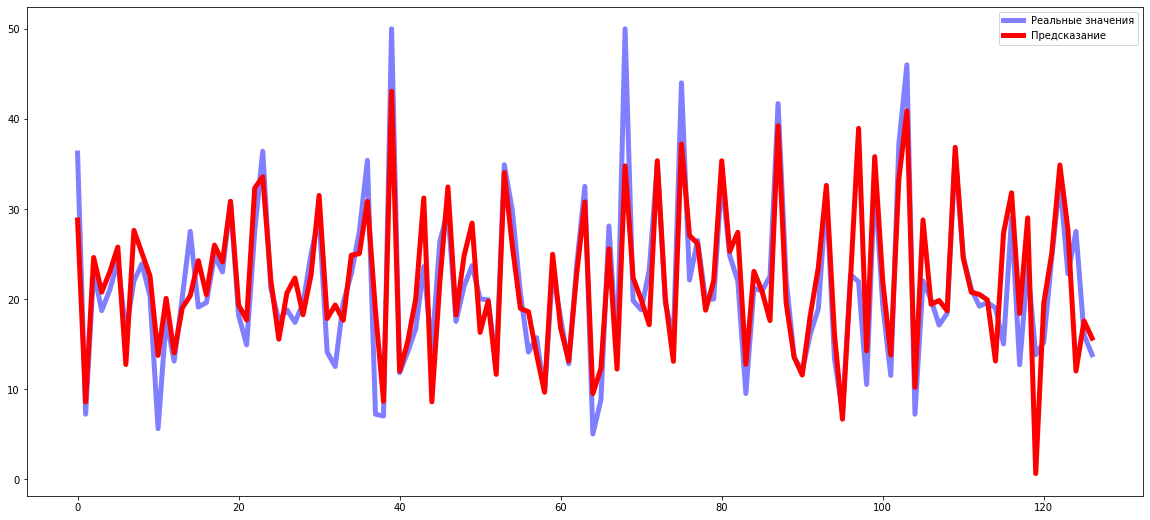

In [112]:
# посмотрим насколько идеальная модель - практически совпадает
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "blue",linewidth=5, label='Реальные значения', alpha=0.5)
plt.plot(pred, "red",linewidth=5, label='Предсказание')
plt.legend(loc='best')
plt.show()

In [120]:
clf = clf.fit(X_train, y_train) #передали данные, затем предсказание

In [121]:
red_clf = clf.predict(X_test)

In [122]:
#  вывод!!!!! видим что RM очень большое, утечка!! если ее удалить 
frame = { 'FeatureImportance': clf.feature_importances_, 'Feature': X_train.columns }
result = pd.DataFrame(frame)
result.sort_values(by='FeatureImportance', ascending=False).head(10)

,FeatureImportance,Feature
10,0.691387,LSTAT
3,0.078713,NOX
5,0.053568,DIS
7,0.042310,TAX
8,0.039309,PTRATIO
9,0.038026,B
1,0.026899,INDUS
4,0.014909,AGE
6,0.009112,RAD
2,0.003027,CHAS


In [123]:
df.corr()


,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ZN,1.000000,-0.533828,-0.042697,-0.516604,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,-0.533828,1.000000,0.062938,0.763651,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.042697,0.062938,1.000000,0.091203,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,-0.516604,0.763651,0.091203,1.000000,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
AGE,-0.569537,0.644779,0.086518,0.731470,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,0.664408,-0.708027,-0.099176,-0.769230,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,-0.311948,0.595129,-0.007368,0.611441,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,-0.314563,0.720760,-0.035587,0.668023,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,-0.391679,0.383248,-0.121515,0.188933,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,0.175520,-0.356977,0.048788,-0.380051,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
